# Análisis estadístico para control de la cadena logística

Este cuadernillo realiza un análisis estadístico básico para evaluar el control del funcionamiento de una cadena logística. 
Incluye los siguientes pasos:
1. **Simulación de datos**: Generación de datos ficticios de tiempos de entrega.
2. **Cálculo de intervalos de confianza**: Determinar el rango dentro del cual probablemente se encuentre la media poblacional.
3. **Contraste de hipótesis**: Verificar si la media muestral difiere significativamente de un valor hipotético.
4. **Interpretación y conclusiones**: Evaluar si se rechaza o no la hipótesis nula (\(H_0\)).

In [1]:
# Importar librerías necesarias
# Numpy para cálculos numéricos, scipy para estadística y matplotlib para visualización.
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

## Simulación de datos

En esta sección, generamos datos ficticios que simulan los tiempos de entrega en días. 
La simulación se basa en una distribución normal con una media conocida (3.5 días) y una desviación estándar (0.5 días).

In [2]:
# Parámetros iniciales
np.random.seed(42)  # Para reproducibilidad
n = 30  # Tamaño de la muestra
media_real = 3.5  # Tiempo medio de entrega en días
desv_estandar_real = 0.5  # Desviación estándar real

# Simulación de datos
tiempos_entrega = np.random.normal(loc=media_real, scale=desv_estandar_real, size=n)

# Mostrar estadísticos descriptivos
media_muestral = np.mean(tiempos_entrega)
desv_muestral = np.std(tiempos_entrega, ddof=1)  # ddof=1 para calcular para una muestra
print("Media muestral:", media_muestral)
print("Desviación estándar muestral:", desv_muestral)

Media muestral: 3.4059265520744817
Desviación estándar muestral: 0.4500032137012056


## Cálculo del intervalo de confianza

El intervalo de confianza al 95% nos indica un rango donde esperamos que se encuentre la media poblacional. 
Utilizamos la distribución t de Student porque estamos trabajando con una muestra pequeña (\(n < 30\)).

In [3]:
# Nivel de confianza
nivel_confianza = 0.95  # 95% de confianza
alpha = 1 - nivel_confianza  # Nivel de significancia

# Cálculo del intervalo de confianza
t_critico = stats.t.ppf(1 - alpha/2, df=n-1)  # Valor crítico t
margen_error = t_critico * (desv_muestral / np.sqrt(n))
ic_min = media_muestral - margen_error
ic_max = media_muestral + margen_error

print(f"Intervalo de confianza al {nivel_confianza*100}%: ({ic_min:.2f}, {ic_max:.2f})")

Intervalo de confianza al 95.0%: (3.24, 3.57)


## Contraste de hipótesis

### Planteamiento
Queremos verificar si la media muestral (\(\bar{x}\)) es significativamente diferente de un valor hipotético (\(\mu_0\)). 
La prueba t para una muestra se formula así:
- **Hipótesis nula (\(H_0\))**: La media muestral es igual a 3.5 días (\(\mu = 3.5\)).
- **Hipótesis alternativa (\(H_a\))**: La media muestral es diferente de 3.5 días (\(\mu \neq 3.5\)).

Si el valor p es menor que \(\alpha\), rechazamos \(H_0\).

In [4]:
# Contraste de hipótesis
media_hipotetica = 3.5  # Valor a contrastar
t_stat, p_valor = stats.ttest_1samp(tiempos_entrega, popmean=media_hipotetica)

print("Estadístico t:", t_stat)
print("Valor p:", p_valor)

# Conclusión del contraste de hipótesis
if p_valor < alpha:
    conclusion = "Rechazamos la hipótesis nula (H0)"
else:
    conclusion = "No se rechaza la hipótesis nula (H0)"

print(conclusion)

Estadístico t: -1.1450173670383257
Valor p: 0.2615641461880168
No se rechaza la hipótesis nula (H0)


## Visualización de los datos simulados

Para analizar la distribución de los datos simulados, graficamos un histograma con la media muestral destacada.

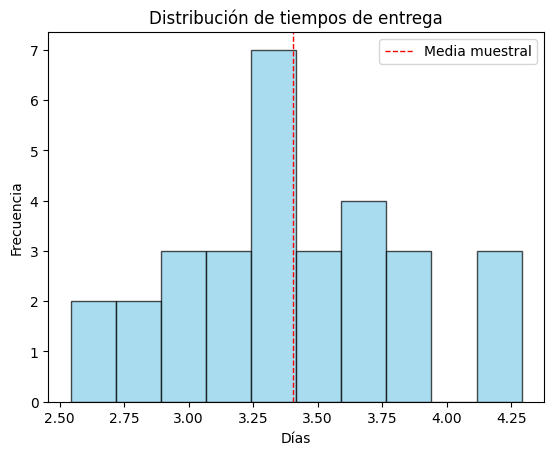

In [5]:
# Visualización
plt.hist(tiempos_entrega, bins=10, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(media_muestral, color='red', linestyle='dashed', linewidth=1, label='Media muestral')
plt.title("Distribución de tiempos de entrega")
plt.xlabel("Días")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

## Conclusión final

Con base en los resultados obtenidos:
- El intervalo de confianza indica el rango donde es probable que se encuentre la media poblacional.
- En el contraste de hipótesis:
  - Si rechazamos \(H_0\), concluimos que la media muestral es significativamente diferente del valor hipotético.
  - Si no se rechaza \(H_0\), no tenemos evidencia suficiente para afirmar que son diferentes.